# Apply K-means to OSHA

In [ ]:
#Install packages 
#!pip install pyldavis

In [ ]:
data_path = "your_path"
data_file_lst = os.listdir(data_path)

In [ ]:
print("data_file_lst: {}".format(data_file_lst))

data_file_lst: ['osha 4470_with_additional_metadata.xlsx']


In [ ]:
import pandas as pd
df = pd.read_excel(data_path+'osha 4470_with_additional_metadata.xlsx')
print(len(df))

4470


In [ ]:
df.head()

,id,title,SUMMARY,industry,diagnosis,occupation,1st occupation,fall dist,cause,fatcause
0,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...,1623,",Other,Other",",Occupation not reported,Occupation not reported",Occupation not reported,-1,Traffic protection,Other
1,202673471,Foreman Is Fatally Crushed When Forklift Tips...,At approximately 6:30 a.m. on May 13 2013 E...,1791,",Fracture",",Supervisors, material moving equipment operators",Supervisors,-1,[],[]
2,202509832,Employee Suffers Abdominal Fracture In Fall F...,On April 9 2013 Employee #1 was installing ...,1521,",Fracture",",Carpenters",Carpenters,8,Exterior carpentry,Fall from/with ladder
3,201562840,Employee'S Body Is Caught In Asphalt Machine ...,On November 27 2012 Employee #1 was operati...,1611,",Amputation",",Construction laborers",Construction laborers,-1,Excavation,Crushed/run
4,202478632,Employee Is Punctured In Abdomen With Nail,At approximately 11:57 a.m. on September 28 ...,1761,",Puncture",",Occupation not reported",Occupation not reported,-1,Roofing,Other


In [ ]:
df.dropna(subset=['title', 'SUMMARY'])

,id,title,SUMMARY,industry,diagnosis,occupation,1st occupation,fall dist,cause,fatcause
0,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...,1623,",Other,Other",",Occupation not reported,Occupation not reported",Occupation not reported,-1,Traffic protection,Other
1,202673471,Foreman Is Fatally Crushed When Forklift Tips...,At approximately 6:30 a.m. on May 13 2013 E...,1791,",Fracture",",Supervisors, material moving equipment operators",Supervisors,-1,[],[]
2,202509832,Employee Suffers Abdominal Fracture In Fall F...,On April 9 2013 Employee #1 was installing ...,1521,",Fracture",",Carpenters",Carpenters,8,Exterior carpentry,Fall from/with ladder
3,201562840,Employee'S Body Is Caught In Asphalt Machine ...,On November 27 2012 Employee #1 was operati...,1611,",Amputation",",Construction laborers",Construction laborers,-1,Excavation,Crushed/run
4,202478632,Employee Is Punctured In Abdomen With Nail,At approximately 11:57 a.m. on September 28 ...,1761,",Puncture",",Occupation not reported",Occupation not reported,-1,Roofing,Other
...,...,...,...,...,...,...,...,...,...,...
4465,200361509,Employee Is Injured In Fall From Second Story...,On February 1 2013 an employee was on secon...,1751,",Fracture",",Carpenters",Carpenters,19,Interior carpentry,Fall from/with scaffold
4466,202523742,Employee Fractures Foot In Fall From Roof,On January 31 2013 an employee was up on a ...,1521,",Fracture",",Construction laborers",Construction laborers,20,[],Fall from roof
4467,170180202,Employee Injured In 15 Ft Fall From Beam,Employee #1 was working on the demolition of ...,1795,",Fracture",",Construction trades, n.e.c.",Construction trades,-1,[],[]
4468,14458012,Struck By Falling Wrecking Bar,ON 10-04-84 AT APPROX. 10:15 A.M. THE OWNER ...,1761,",Other",",Helpers, construction trades",Helpers,-1,[],[]


In [ ]:
print(len(df))

4470


In [ ]:
df.head(5)

,id,title,SUMMARY,industry,diagnosis,occupation,1st occupation,fall dist,cause,fatcause
0,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...,1623,",Other,Other",",Occupation not reported,Occupation not reported",Occupation not reported,-1,Traffic protection,Other
1,202673471,Foreman Is Fatally Crushed When Forklift Tips...,At approximately 6:30 a.m. on May 13 2013 E...,1791,",Fracture",",Supervisors, material moving equipment operators",Supervisors,-1,[],[]
2,202509832,Employee Suffers Abdominal Fracture In Fall F...,On April 9 2013 Employee #1 was installing ...,1521,",Fracture",",Carpenters",Carpenters,8,Exterior carpentry,Fall from/with ladder
3,201562840,Employee'S Body Is Caught In Asphalt Machine ...,On November 27 2012 Employee #1 was operati...,1611,",Amputation",",Construction laborers",Construction laborers,-1,Excavation,Crushed/run
4,202478632,Employee Is Punctured In Abdomen With Nail,At approximately 11:57 a.m. on September 28 ...,1761,",Puncture",",Occupation not reported",Occupation not reported,-1,Roofing,Other


In [ ]:
title = df['title']
summary = df['SUMMARY']

In [ ]:
title.head()

0     Two Workers Are Struck By Motor Vehicle And O...
1     Foreman Is Fatally Crushed When Forklift Tips...
2     Employee Suffers Abdominal Fracture In Fall F...
3     Employee'S Body Is Caught In Asphalt Machine ...
4          Employee Is Punctured In Abdomen With Nail 
Name: title, dtype: object

In [ ]:
summary.head()

0     On August 27  2013  Employees #1 and #2  of T...
1     At approximately 6:30 a.m. on May 13  2013  E...
2     On April 9  2013  Employee #1 was installing ...
3     On November 27  2012  Employee #1 was operati...
4     At approximately 11:57 a.m. on September 28  ...
Name: SUMMARY, dtype: object

## Preprocessing: Remove punctuation, lower alphabet

### About Title

In [ ]:
import re
title = title.apply(lambda x: x.strip())
# Remove punctuation
title = title.apply(lambda x: re.sub('[.,\!]', '', str(x)))
# Lower the letter
title = title.apply(lambda x: x.lower())
title.head()

0    two workers are struck by motor vehicle and on...
1    foreman is fatally crushed when forklift tips ...
2    employee suffers abdominal fracture in fall fr...
3    employee's body is caught in asphalt machine  ...
4           employee is punctured in abdomen with nail
Name: title, dtype: object

### About Summary

In [ ]:
import re
summary = summary.apply(lambda x: x.strip())
# Remove punctuation
summary = summary.apply(lambda x: re.sub('[.,\!]', '', str(x)))
# Lower the letter
summary = summary.apply(lambda x: x.lower())
summary.head()

0    on august 27  2013  employees #1 and #2  of te...
1    at approximately 6:30 am on may 13  2013  empl...
2    on april 9  2013  employee #1 was installing v...
3    on november 27  2012  employee #1 was operatin...
4    at approximately 11:57 am on september 28  201...
Name: SUMMARY, dtype: object

## TF-IDF vectorization

### About Title

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import gensim
from gensim.utils import simple_preprocess

In [ ]:
stop_words = stopwords.words('english')
extend_lst = ['from', '']

stop_words.extend(extend_lst)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
title_tolist = title.tolist()
title_tolist

['two workers are struck by motor vehicle and one is killed',
 'foreman is fatally crushed when forklift tips over',
 'employee suffers abdominal fracture in fall from ladder',
 "employee's body is caught in asphalt machine  dies",
 'employee is punctured in abdomen with nail',
 'carpenter is injured in fall from ceiling joist',
 'pipeline worker is struck and injured by falling cement',
 'employee crushes leg  suffers possible fracture',
 'worker falls from roof and breaks arm',
 'driver hurt when truck unloading sand overturns',
 'tile setter sustains injuries in fall from ladder',
 'crane operator incurs knee injury when crane tips over',
 'employee is killed in fall from suspension scaffold',
 'employee killed in fall from man lift',
 'employee killed in fall from roof',
 "employee's thigh lacerated with abrasive from machine",
 'asphyxiated in rail car; air compressor failed',
 'employee killed in fall from telecommunications tower',
 'worker is struck by abrasive disk from concre

In [ ]:
prep_sent_list = []

## Remove Stopwords
for i in range(len(title_tolist)):
  sent = title_tolist[i]
  empty_lst = []
  for word in sent.split(" "): 
    if word not in  stop_words:
      empty_lst.append(word)
  input_str = ' '.join(empty_lst)
  prep_sent_list.append(input_str)

prep_sent_list

['two workers struck motor vehicle one killed',
 'foreman fatally crushed forklift tips',
 'employee suffers abdominal fracture fall ladder',
 "employee's body caught asphalt machine dies",
 'employee punctured abdomen nail',
 'carpenter injured fall ceiling joist',
 'pipeline worker struck injured falling cement',
 'employee crushes leg suffers possible fracture',
 'worker falls roof breaks arm',
 'driver hurt truck unloading sand overturns',
 'tile setter sustains injuries fall ladder',
 'crane operator incurs knee injury crane tips',
 'employee killed fall suspension scaffold',
 'employee killed fall man lift',
 'employee killed fall roof',
 "employee's thigh lacerated abrasive machine",
 'asphyxiated rail car; air compressor failed',
 'employee killed fall telecommunications tower',
 'worker struck abrasive disk concrete machine',
 'worker lacerates hand angle grinder used concrete',
 "abrasive wheel cut saw breaks cuts employee's face",
 'employee cuts thumb grinding wheel',
 "emp

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(prep_sent_list)

In [ ]:
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

4470 rows


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4430,4431,4432,4433,4434,4435,4436,4437,4438,4439,4440,4441,4442,4443,4444,4445,4446,4447,4448,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458,4459,4460,4461,4462,4463,4464,4465,4466,4467,4468,4469
motor,0.497345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
workers,0.466893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vehicle,0.424960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.793927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.793927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
one,0.378512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.78917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
two,0.340051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn import cluster
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               #, n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [ ]:
kmeans = cluster.KMeans(n_clusters = 3
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               #, n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full').fit(final_df)
labels = kmeans.labels_

In [ ]:
new_dfa = pd.DataFrame(data = final_df)
new_dfa['label_kmeans'] = labels
new_dfa

,10,10ft,11,12,120,122,13,14,15,16,17,18,19,1st,20,2000,21,22,240,25,27,29,2nd,30,35,380,3rd,40,480,621,6370,70,80,90,93,abdomen,abdominal,abrasions,abrasive,ac,...,welded,welder,welding,well,west,wet,whaler,wheel,whenstructural,whipped,whips,wi,widow,winch,wind,window,wing,wire,wired,wires,wiring,within,woker,wood,wooden,work,worker,workers,working,worksite,workstation,wound,wrecking,wrench,wrist,wrists,yoke,young,zone,label_kmeans
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.466893,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.668903,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.660658,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.650409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.695052,0.0,0.0,0.0,0.0,0.0,0.0,1


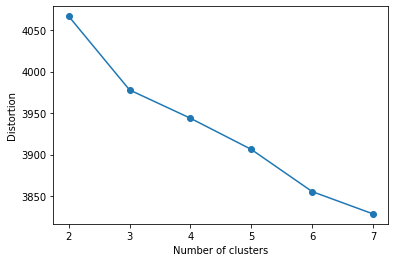

In [ ]:
distortions = []
for i in range(2, 8):
    km = cluster.KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(final_df)
    distortions.append(km.inertia_)

# plot
plt.plot(range(2, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Silhouette score

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [ ]:
# Running Kmeans
k = 8
kmeans_results = run_KMeans(k, final_df)


In [ ]:
df = final_df.to_numpy()
avg_dict = dict()
for n_clusters, kmeans in kmeans_results.items():      
    kmeans_labels = kmeans.predict(df)
    silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
    avg_dict.update( {silhouette_avg : n_clusters} )
avg_dict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/pytho

{0.06380864648188318: 3,
 0.06650795308789918: 2,
 0.06838947259963506: 4,
 0.06886298704833389: 6,
 0.07058618914533567: 7,
 0.07194296388571939: 5,
 0.07227101791239776: 8}

###Cluster analysis

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


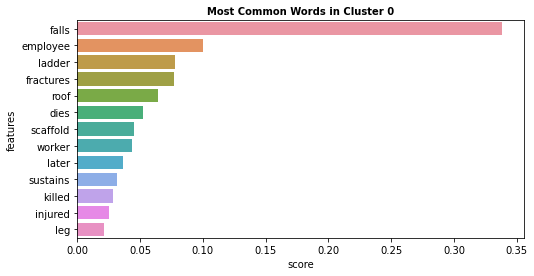

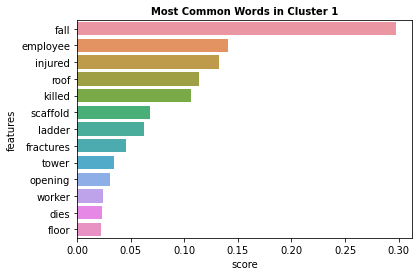

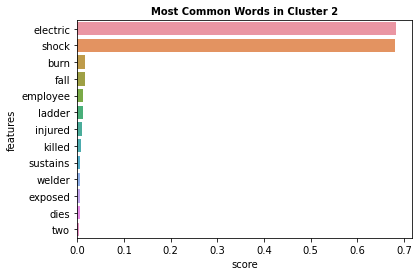

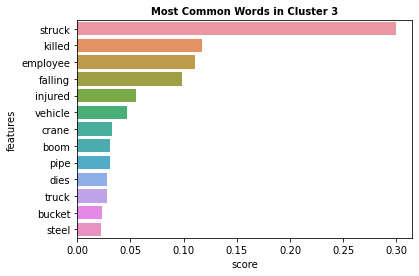

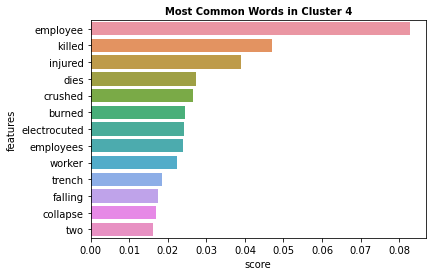

In [ ]:
best_result = 5
kmeans = kmeans_results.get(best_result)
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

### Map of words


In [ ]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991
0,1.510689e-03,1.691057e-03,-1.084202e-19,1.124402e-03,2.981556e-19,-1.355253e-19,-4.607859e-19,2.504798e-03,3.895596e-03,2.931880e-03,-1.084202e-19,3.427453e-03,-2.710505e-20,2.032879e-19,1.284603e-03,1.355253e-20,1.574351e-03,-1.355253e-19,1.626303e-19,1.322566e-03,3.252607e-19,-2.168404e-19,2.032879e-19,1.272212e-03,-1.084202e-19,1.626303e-19,5.421011e-20,3.998865e-03,-4.065758e-20,1.355253e-19,1.355253e-20,1.434281e-03,1.558256e-03,1.432007e-03,3.252607e-19,2.168404e-19,1.084202e-19,1.608643e-03,-9.757820e-19,-1.626303e-19,...,1.626303e-19,2.168404e-19,6.505213e-19,-1.301043e-18,2.168404e-19,-5.421011e-20,7.589415e-19,-1.084202e-19,-1.951564e-18,1.356297e-03,2.439455e-19,9.486769e-20,1.084202e-19,9.486769e-20,3.252607e-19,4.878910e-19,1.084202e-19,-2.981556e-19,0.000000e+00,0.000000,-5.421011e-19,6.505213e-19,5.421011e-20,1.355253e-19,3.469447e-18,1.084202e-19,5.626269e-03,4.389200e-02,3.377381e-03,3.945005e-03,2.439455e-19,1.355253e-20,1.579014e-03,-3.794708e-19,1.663595e-03,1.567166e-02,1.975701e-03,9.486769e-20,-5.421011e-20,-7.589415e-19
1,4.878910e-19,1.626303e-19,5.556536e-19,6.762018e-04,5.149960e-19,3.794708e-19,-6.776264e-19,7.318365e-19,7.365904e-04,5.874900e-04,1.355253e-19,1.084202e-19,2.846031e-19,5.149960e-19,1.084202e-18,-4.743385e-19,5.421011e-19,2.710505e-20,7.993705e-04,7.077236e-04,1.554199e-03,2.710505e-20,5.149960e-19,-9.215718e-19,-5.421011e-20,7.993705e-04,-1.084202e-19,1.409463e-18,-2.981556e-19,1.626303e-19,-4.201283e-19,-1.138412e-18,-6.505213e-19,1.355253e-18,3.794708e-19,4.065758e-19,7.575346e-04,8.657858e-04,1.355253e-18,-1.355253e-19,...,2.168404e-19,7.331784e-04,-5.854692e-18,7.377588e-04,1.650727e-03,6.776264e-19,8.053448e-04,8.399326e-04,-2.168404e-19,4.065758e-20,-4.878910e-19,-2.439455e-19,-5.692061e-19,-4.336809e-19,2.710505e-19,1.579511e-03,1.021316e-03,-3.794708e-19,-5.204170e-18,0.000000,1.626303e-18,7.589415e-19,-3.930233e-19,3.930233e-19,1.244625e-03,1.861113e-03,5.215261e-03,2.410460e-02,1.151523e-03,-1.084202e-17,-1.897354e-19,-5.692061e-19,-4.878910e-19,5.421011e-20,3.469447e-18,2.282643e-03,1.626303e-19,8.131516e-20,4.065758e-19,-9.757820e-19
2,0.000000e+00,1.355253e-19,-1.084202e-19,-3.252607e-19,1.897354e-19,-2.710505e-20,-3.252607e-19,5.421011e-20,-3.252607e-19,-8.673617e-19,-4.065758e-20,-3.794708e-19,0.000000e+00,1.219727e-19,1.084202e-19,0.000000e+00,-1.626303e-19,-1.084202e-19,5.421011e-20,-5.421011e-19,2.168404e-19,-1.897354e-19,1.219727e-19,3.794708e-19,-1.355253e-19,5.421011e-20,-5.421011e-20,-2.168404e-19,-2.710505e-20,8.131516e-20,-5.421011e-20,-5.421011e-19,2.710505e-20,-1.084202e-19,1.626303e-19,1.355253e-19,5.421011e-20,-2.710505e-19,-6.505213e-19,-1.355253e-19,...,1.084202e-19,8.131516e-20,5.476650e-03,-6.505213e-19,2.168404e-19,-8.131516e-20,4.336809e-19,0.000000e+00,-8.673617e-19,2.710505e-20,1.897354e-19,4.065758e-20,1.084202e-19,6.776264e-20,2.168404e-19,3.794708e-19,-2.168404e-19,-2.168404e-19,-6.505213e-19,0.000000,-4.336809e-19,4.336809e-19,4.065758e-20,1.084202e-19,2.385245e-18,0.000000e+00,-2.602085e-18,6.938894e-18,8.673617e-19,-1.301043e-18,1.084202e-19,0.000000e+00,-8.131516e-20,-2.168404e-19,-6.505213e-19,2.168404e-18,-4.336809e-19,8.131516e-20,-5.421011e-20,-6.505213e-19
3,8.131516e-20,1.626303e-19,9.486769e-20,-1.246832e-18,4.336809e-19,-2.439455e-19,-5.692061e-19,0.000000e+00,1.084202e-19,-2.818926e-18,-1.626303e-19,-9.757820e-19,-2.710505e-20,3.252607e-19,8.131516e-19,-4.065758e-20,2.710505e-20,-1.355253e-19,-2.710505e-20,-1.517883e-18,3.252607e-19,-2.439455e-19,3.252607e-19,1.084202e-19,-1.355253e-19,-2.710505e-20,-1.897354e-19,5.421011e-19,-1.355253e-19,1.626303e-19,-4.065758e-20,-9.215718e-19,-2.439455e-19,2.710505e-19,4.607859e-19,2.

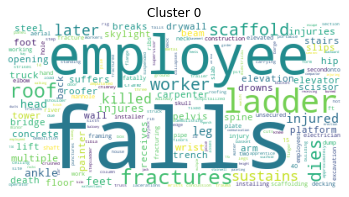

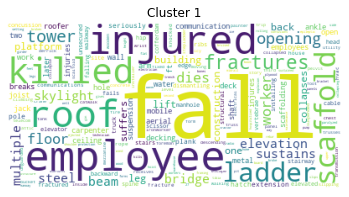

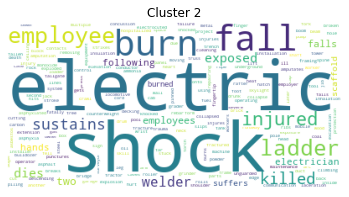

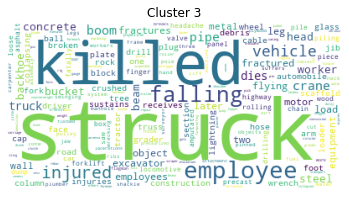

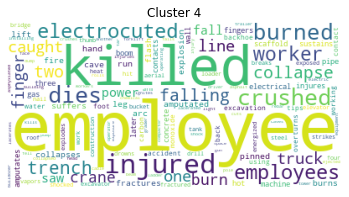

In [ ]:
from wordcloud import WordCloud
centroids.columns = final_df.columns
generateWordClouds(centroids)